In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
start_date=datetime.datetime(2021,1,1)
end_date=datetime.datetime(2021,6,1)

In [3]:
tata=web.DataReader('TTM','yahoo',start_date,end_date)

In [4]:
tata.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,12.67,12.56,12.58,12.60,957900,12.60
2021-01-04,13.15,12.67,12.97,12.76,1898200,12.76
2021-01-05,13.36,12.90,12.93,13.30,1802000,13.30
2021-01-06,13.51,13.23,13.39,13.34,1898000,13.34
2021-01-07,13.47,13.35,13.39,13.45,997600,13.45


In [5]:
def FindingAllPeck(tata):
    temp=tata['High'][0]
    peaks=pd.DataFrame()
    for i,row in tata.iterrows():
        if row['High']>temp:
            peaks=peaks.append(pd.Series({'High':row['High']},name=i))
        temp=row['High']    
    return peaks

In [6]:
def FindingAllLows(tata):
    temp=tata['Low'][0]
    lows=pd.DataFrame()
    for i,row in tata.iterrows():
        if row['Low']<temp:
            lows=lows.append(pd.Series({'Low':row['Low']},name=i))
        temp=row['Low']    
    return lows

In [7]:
def returns(tata):
    temp=tata['Close'][0]
    last=tata['Close'][0]
    returns=pd.DataFrame()
    for i,row in tata.iterrows():
        temp=row['Close']-last
        returns=returns.append(pd.Series({'Returns':temp},name=i))
        last=row['Close']
    return returns

In [8]:
#4
def N4():
    returns(tata).plot(figsize=(15,7))
    plt.title('Tata Motors Limited (TTM) Percentage Returns')
    plt.ylabel('Percentage Returns')
    plt.xlabel('Date')
    plt.show()
    print('Data')
    print(returns(tata))

In [9]:
#3
def N3():
    FindingAllLows(tata).plot(figsize=(15,7))
    plt.title('Tata Motors Limited (TTM) All Lows')
    plt.ylabel('Stock Prices')
    plt.xlabel('Date')
    plt.show()
    print('Data')
    print(FindingAllLows(tata))

In [10]:
#0
def N0():
    tata['High'].plot(label="Pick Price",figsize=(15,7))
    tata['Low'].plot(label="Lowest Price")
    tata['Open'].plot(label="Opening Price")
    tata['Close'].plot(label="Closeing Price")
    plt.legend()
    plt.title('Tata Motors Limited (TTM)')
    plt.ylabel('Stock Prices')
    plt.show()

In [11]:
#2
def N2():    
    FindingAllPeck(tata).plot(figsize=(15,7))
    plt.title('Tata Motors Limited (TTM) All Pecks')
    plt.ylabel('Stock Prices')
    plt.xlabel('Date')
    plt.show()
    print('Data')
    print(FindingAllPeck(tata))

In [12]:
#1
def N1():
    tata['Volume'].plot(label='Volume',figsize=(15,7))
    plt.title('Volume of Tata moters')
    plt.show()
    print('Data')
    print(tata['Volume'])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [14]:
def Prediction_of_high(tata):
    #getting High prices for Prediction
    tata=tata[['High']]
    
    #making a coloumb for prediction
    future_days=30
    tata['Prediction']=tata[['High']].shift(-future_days)
    #tata.head()
    
    #creating a feature data set (X) and convert it into numpy array and remove last 'X' rows/days
    X=np.array(tata.drop(['Prediction'],1))[:-future_days]
    
    #creating a target data set y and convert it to the numpy array and get all the target values except the last 'x' rows/days
    y=np.array(tata["Prediction"])[:-future_days]
    
    #spliting data into 75% train and 25% test
    x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25)
    
    #creating a Decision tree regressor model
    tree=DecisionTreeRegressor().fit(x_train,y_train)
    #also creating a Liner regressor model For comparision
    lr=LinearRegression().fit(x_train,y_train)

    
    #getting last 'x' rows of predicted data set
    x_pred=tata.drop(['Prediction'],1)[:-future_days]
    x_pred=x_pred.tail(future_days) 
    x_pred=np.array(x_pred)
    
    
    #Show the prediction
    #tree model
    tree_prediction=tree.predict(x_pred)
            #print(tree_prediction)
            #print()
    #linear model
    lr_prediction=lr.predict(x_pred)
            #print(lr_prediction)
        
     
    #ploting Graph of tree model prediction
    prediction=tree_prediction

    valid=tata[X.shape[0]:]
    valid['Prediction']=prediction
    plt.figure(figsize=(15,7))
    plt.title('Deision Tree Regresser Prediction')
    plt.xlabel('Date')
    plt.ylabel('High Price')
    plt.plot(tata["High"])
    plt.plot(valid[['High','Prediction']])
    plt.legend(['Original Price','Valid Price','Prediction'])
    plt.show()
    
    print()
    
    #ploting Graph of linear model prediction
    prediction=lr_prediction

    valid=tata[X.shape[0]:]
    valid['Prediction']=prediction
    plt.figure(figsize=(15,7))
    plt.title('Linear Regression Prediction')
    plt.xlabel('Date')
    plt.ylabel('High Price')
    plt.plot(tata["High"])
    plt.plot(valid[['High','Prediction']])
    plt.legend(['Original Price','Valid Price','Prediction'])
    plt.show()

Press following number to know for Tata Motors Limited (TTM) Stocks
0 = All in one Graph (Pick Price,Lowest Price,Opening Price,Closeing Price)
1 = Volume
2 = All Pecks
3 = All Lowes
4 = % Returns
5 = For Predictions of High(Include two models Linear Regression and Decision Tree Regression. )
Enter Number2


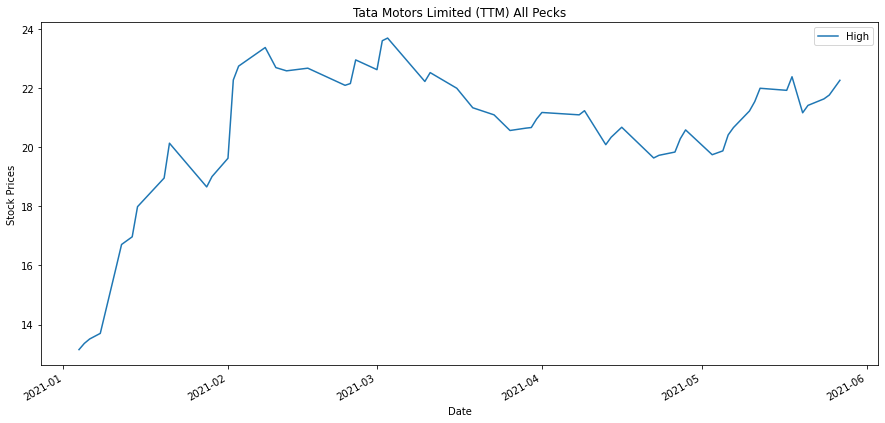

Data
                 High
2021-01-04  13.150000
2021-01-05  13.360000
2021-01-06  13.510000
2021-01-08  13.700000
2021-01-11  15.950000
2021-01-12  16.709999
2021-01-14  16.969999
2021-01-15  17.990000
2021-01-20  18.959999
2021-01-21  20.139999
2021-01-28  18.660000
2021-01-29  19.010000
2021-02-01  19.629999
2021-02-02  22.280001
2021-02-03  22.750000
2021-02-08  23.379999
2021-02-10  22.700001
2021-02-12  22.590000
2021-02-16  22.680000
2021-02-23  22.100000
2021-02-24  22.160000
2021-02-25  22.959999
2021-03-01  22.629999
2021-03-02  23.610001
2021-03-03  23.700001
2021-03-10  22.230000
2021-03-11  22.530001
2021-03-16  22.000000
2021-03-19  21.340000
2021-03-23  21.100000
2021-03-26  20.570000
2021-03-29  20.650000
2021-03-30  20.670000
2021-03-31  20.959999
2021-04-01  21.180000
2021-04-08  21.100000
2021-04-09  21.240000
2021-04-13  20.090000
2021-04-14  20.340000
2021-04-16  20.680000
2021-04-22  19.639999
2021-04-23  19.730000
2021-04-26  19.840000
2021-04-27  20.290001
2021-

In [15]:
print('Press following number to know for Tata Motors Limited (TTM) Stocks')
print("0 = All in one Graph (Pick Price,Lowest Price,Opening Price,Closeing Price)\n1 = Volume\n2 = All Pecks\n3 = All Lowes\n4 = % Returns\n5 = For Predictions of High(Include two models Linear Regression and Decision Tree Regression. )")
validInput=['0','1','2','3','4','5']      
while True:
    vbl=input("Enter Number")
    if vbl not in validInput:
        print("Not a valid input")
    else:
        break
if vbl=='0':
    N0()
elif vbl=='1':
    N1()
elif vbl=='2':
    N2()
elif vbl=='3':
    N3()    
elif vbl=='4':
    N4()      
else:
    Prediction_of_high(tata)
      

In [16]:
tata.head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,12.670000,12.560000,12.580000,12.600000,957900,12.600000
2021-01-04,13.150000,12.670000,12.970000,12.760000,1898200,12.760000
2021-01-05,13.360000,12.900000,12.930000,13.300000,1802000,13.300000
2021-01-06,13.510000,13.230000,13.390000,13.340000,1898000,13.340000
2021-01-07,13.470000,13.350000,13.390000,13.450000,997600,13.450000
2021-01-08,13.700000,13.430000,13.500000,13.670000,1662400,13.670000
2021-01-11,15.950000,15.020000,15.020000,15.900000,7612300,15.900000
2021-01-12,16.709999,16.190001,16.240000,16.549999,4770700,16.549999
2021-01-13,16.680000,16.080000,16.650000,16.270000,2466500,16.270000
